# **MODELING - LINEAR REGRESSION**

- Xây dựng mô hình Linear Regression từ đầu với NumPy để dự đoán Customer Churn.
- Sử dụng Matplotlib và Seaborn để trực quan hóa kết quả.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append("../src")
from models import *
from visualization import *

np.set_printoptions(suppress=True, precision=4, linewidth=120)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# **1. Load Preprocessed Data**
Load dữ liệu đã được xử lý từ `02_preprocessing.ipynb`.

LOADED PREPROCESSED DATA
Features shape: (10127, 40)
Target shape: (10127,)
Number of features: 40


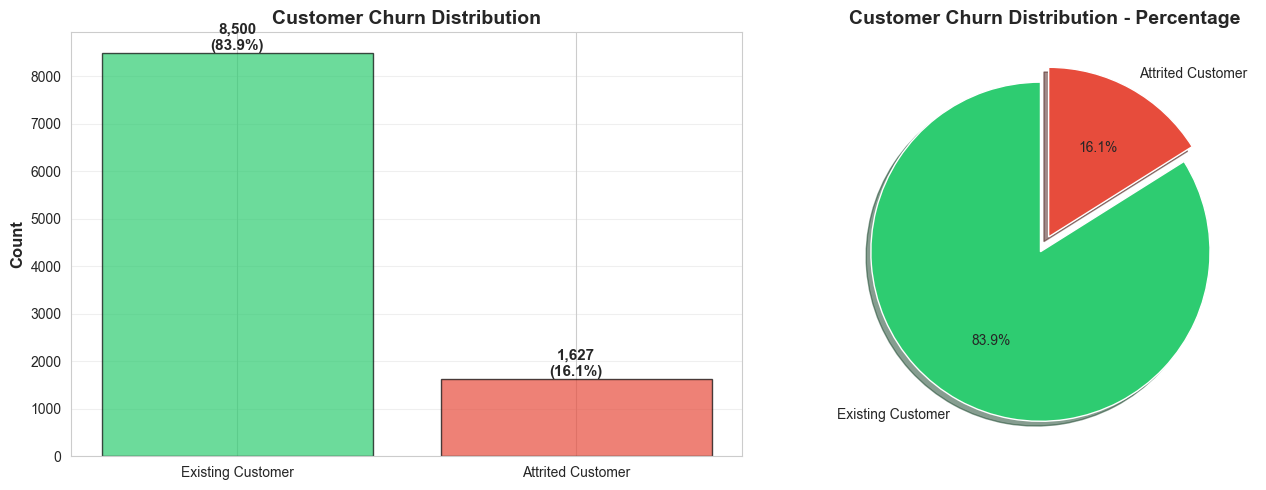

In [55]:
# Load preprocessed data
X = np.load("../data/processed/X_preprocessed.npy")
y = np.load("../data/processed/y_target.npy")

# Load feature names
with open("../data/processed/feature_names.txt", "r") as f:
    feature_names = [line.strip() for line in f.readlines()]


print("LOADED PREPROCESSED DATA")

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {len(feature_names)}")

# Visualize target distribution
fig = plot_target_distribution(y, title="Customer Churn Distribution",
                               labels=['Existing Customer', 'Attrited Customer'])
plt.show()



# **2. Train-Test Split**
Chia dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%).

TRAIN-TEST SPLIT
Training set: (8102, 40)
Test set: (2025, 40)


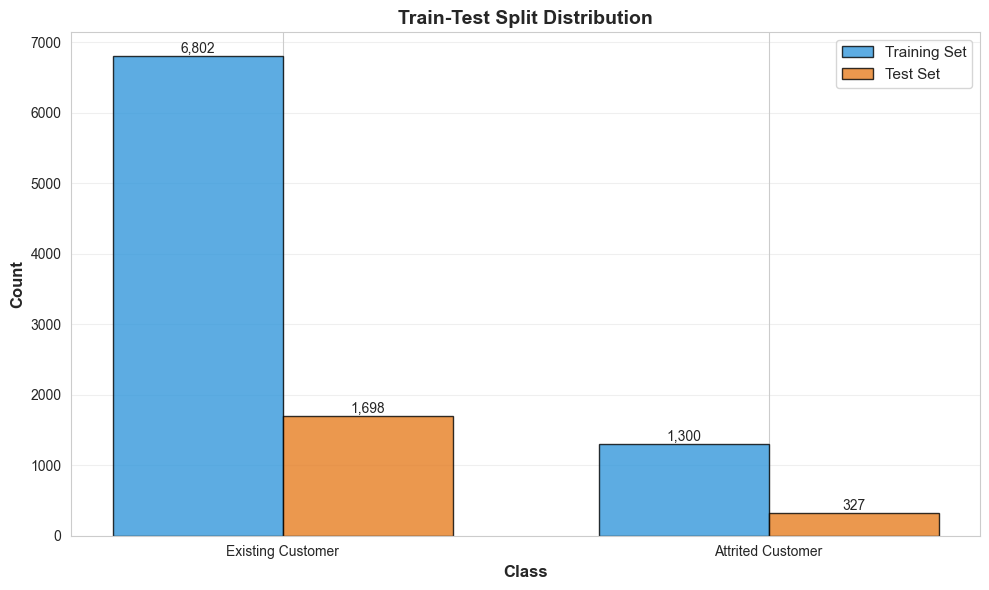

In [56]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)


print("TRAIN-TEST SPLIT")

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Visualize train-test distribution
fig = plot_train_test_split(y_train, y_test, 
                            labels=['Existing Customer', 'Attrited Customer'])
plt.show()



# **3. Linear Regression Model**

## 3.1. Training với Gradient Descent

Dùng Linear Regression để predict probability of churn (0 to 1).

In [57]:

print("LINEAR REGRESSION - GRADIENT DESCENT")

# Initialize model với Gradient Descent
lr_model = LinearRegression(
    method='gradient_descent',
    learning_rate=0.01,
    n_iterations=5000
)

# Train
print("\nTraining...")
lr_model.fit(X_train, y_train)
print("Training completed!")

# Check history
print(f"\nTraining iterations: {len(lr_model.history['loss'])}")
print(f"Initial loss: {lr_model.history['loss'][0]:.6f}")
print(f"Final loss: {lr_model.history['loss'][-1]:.6f}")



LINEAR REGRESSION - GRADIENT DESCENT

Training...
Training completed!

Training iterations: 5000
Initial loss: 0.160454
Final loss: 0.079658
Training completed!

Training iterations: 5000
Initial loss: 0.160454
Final loss: 0.079658


## 3.2. Visualize Training Process

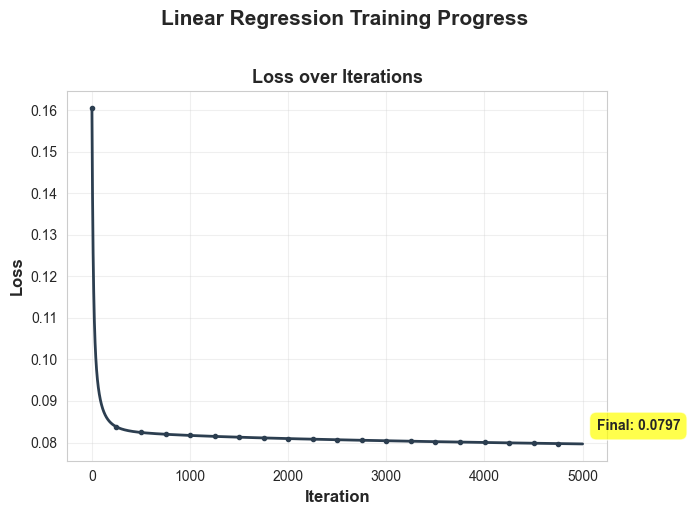

In [58]:
# Plot training history
fig = plot_training_history(lr_model.history, metrics=['loss'], 
                            title="Linear Regression Training Progress")
plt.show()

# **4. Model Evaluation**

## 4.1. Make Predictions

In [59]:
# Predictions (continuous values)
y_train_pred_continuous = lr_model.predict(X_train)
y_test_pred_continuous = lr_model.predict(X_test)

# Convert to binary classification (threshold = 0.5)
y_train_pred = (y_train_pred_continuous >= 0.5).astype(int)
y_test_pred = (y_test_pred_continuous >= 0.5).astype(int)

# Clip probabilities to [0, 1]
y_train_proba = np.clip(y_train_pred_continuous, 0, 1)
y_test_proba = np.clip(y_test_pred_continuous, 0, 1)


print("PREDICTIONS GENERATED")

print(f"Train predictions range: [{y_train_pred_continuous.min():.4f}, {y_train_pred_continuous.max():.4f}]")
print(f"Test predictions range: [{y_test_pred_continuous.min():.4f}, {y_test_pred_continuous.max():.4f}]")


PREDICTIONS GENERATED
Train predictions range: [-0.5135, 1.1051]
Test predictions range: [-0.3841, 1.1884]


## 4.2. Performance Metrics - Train Set

In [60]:
# Calculate train metrics
train_acc = accuracy_score(y_train, y_train_pred)
train_prec = precision_score(y_train, y_train_pred)
train_rec = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred_continuous)

train_metrics = {
    'Accuracy': train_acc,
    'Precision': train_prec,
    'Recall': train_rec,
    'F1-Score': train_f1
}

print("\n TRAINING SET PERFORMANCE:")
for metric, value in train_metrics.items():
    print(f"  {metric:<12}: {value:.4f}")
print(f"  {'MSE':<12}: {train_mse:.6f}")


 TRAINING SET PERFORMANCE:
  Accuracy    : 0.9059
  Precision   : 0.8521
  Recall      : 0.5008
  F1-Score    : 0.6308
  MSE         : 0.079657


## 4.3. Performance Metrics - Test Set

In [61]:
# Calculate test metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred_continuous)
test_auc = roc_auc_score(y_test, y_test_proba)

test_metrics = {
    'Accuracy': test_acc,
    'Precision': test_prec,
    'Recall': test_rec,
    'F1-Score': test_f1
}

print("\n TEST SET PERFORMANCE:")
for metric, value in test_metrics.items():
    print(f"  {metric:<12}: {value:.4f}")
print(f"  {'MSE':<12}: {test_mse:.6f}")
print(f"  {'ROC AUC':<12}: {test_auc:.4f}")


 TEST SET PERFORMANCE:
  Accuracy    : 0.8958
  Precision   : 0.8372
  Recall      : 0.4404
  F1-Score    : 0.5772
  MSE         : 0.083973
  ROC AUC     : 0.0830


## 4.4. Visualize Performance Metrics

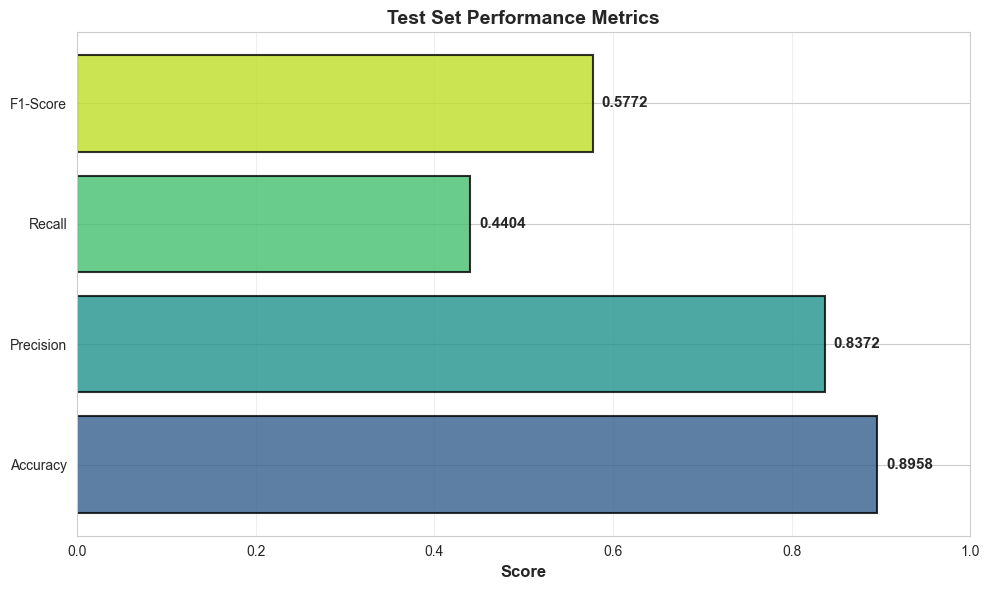

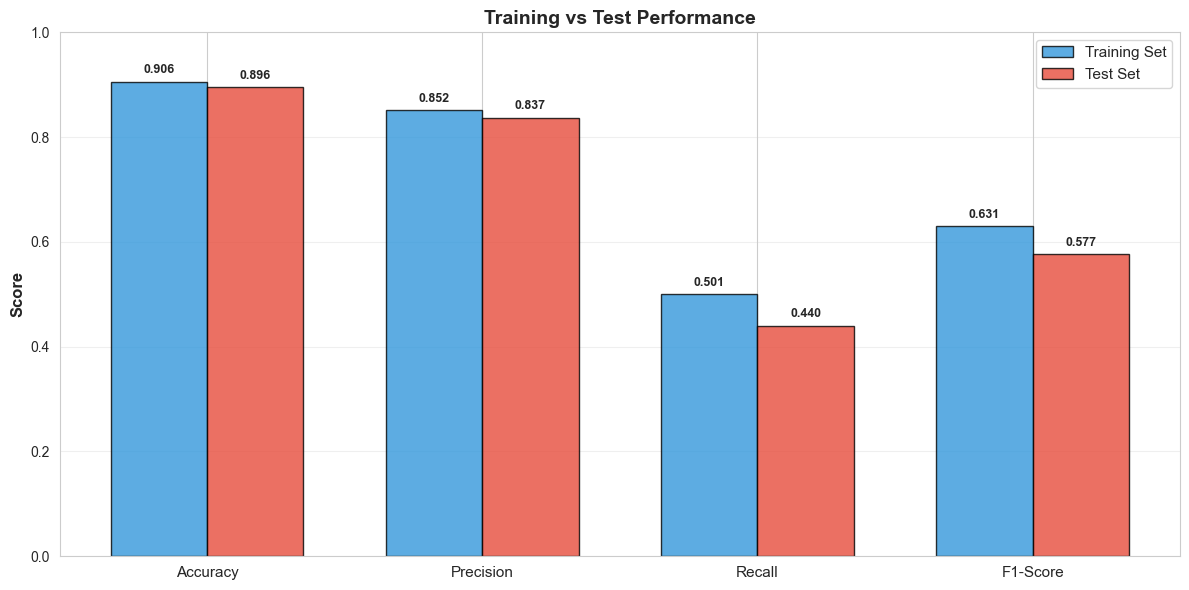

In [62]:
# Plot test metrics
fig = plot_metrics_comparison(test_metrics, title="Test Set Performance Metrics")
plt.show()

# Compare train vs test
fig = plot_train_test_comparison(train_metrics, test_metrics, 
                                 title="Training vs Test Performance")
plt.show()

# **5. Confusion Matrix Analysis**

CONFUSION MATRIX
                    Predicted
                Existing    Attrited
Actual  Existing     1670          28     (TN, FP)
        Attrited      183         144     (FN, TP)


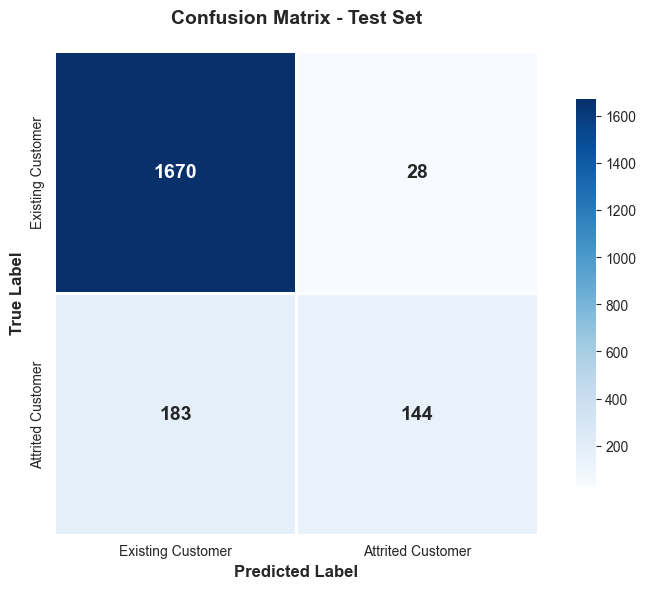

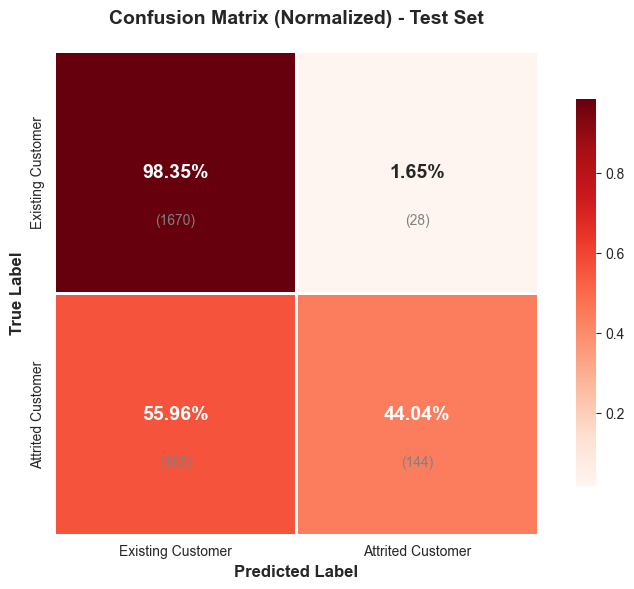

In [63]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


print("CONFUSION MATRIX")

print(f"                    Predicted")
print(f"                Existing    Attrited")
print(f"Actual  Existing    {cm[0,0]:>5}       {cm[0,1]:>5}     (TN, FP)")
print(f"        Attrited    {cm[1,0]:>5}       {cm[1,1]:>5}     (FN, TP)")


# Visualize confusion matrix
fig = plot_confusion_matrix(cm, labels=['Existing Customer', 'Attrited Customer'],
                           title="Confusion Matrix - Test Set")
plt.show()

# Visualize normalized version
fig = plot_confusion_matrix(cm, labels=['Existing Customer', 'Attrited Customer'],
                           title="Confusion Matrix (Normalized) - Test Set",
                           normalize=True, cmap='Reds')
plt.show()

# **6. Prediction Distribution Analysis**

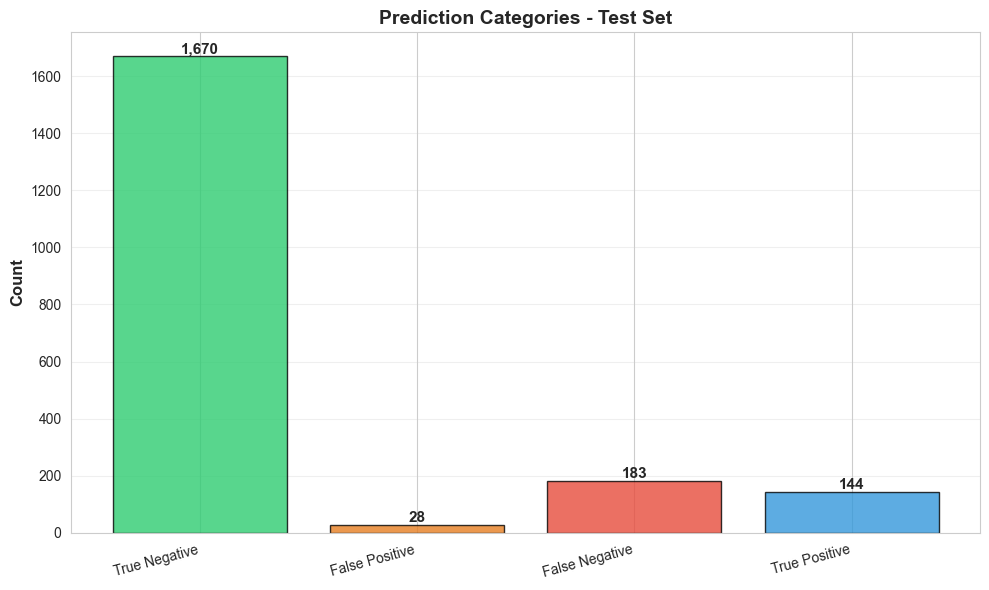

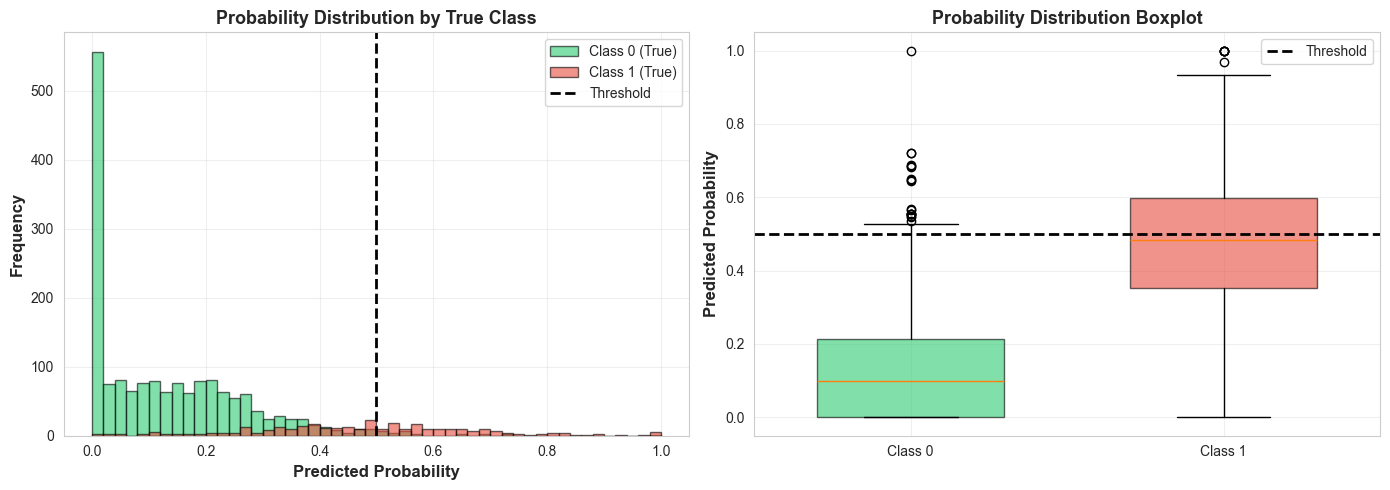

In [64]:
# Plot prediction categories
fig = plot_prediction_distribution(y_test, y_test_pred, 
                                   title="Prediction Categories - Test Set")
plt.show()

# Plot probability distributions
fig = plot_prediction_distribution(y_test, y_test_pred, y_proba=y_test_proba,
                                   title="Predicted Probability Distribution")
plt.show()

# **7. ROC Curve**

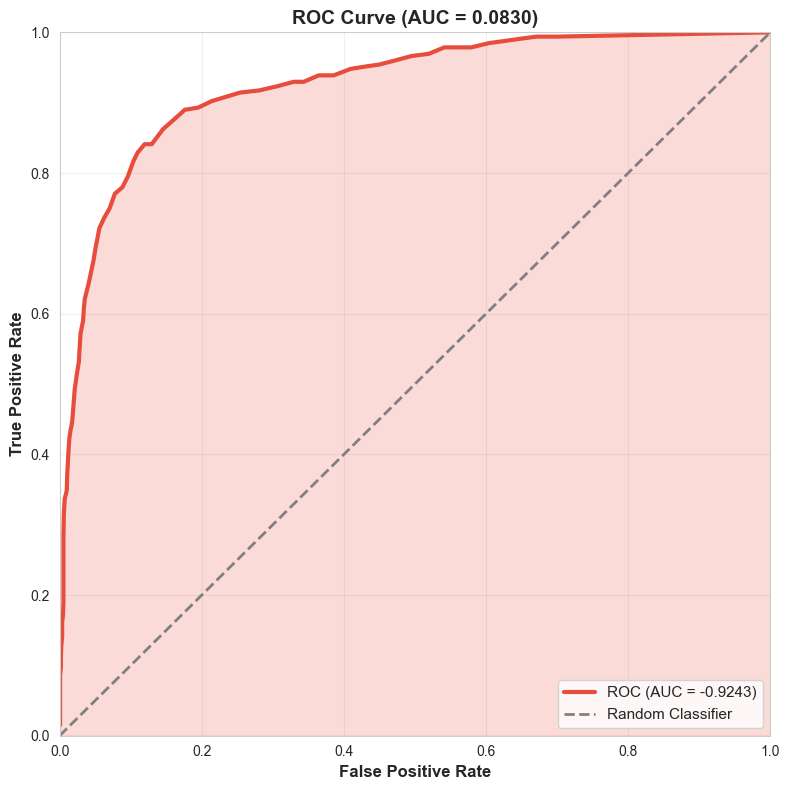


AUC Score: 0.0830
   Poor discrimination ability


In [65]:
# Plot ROC curve
fig = plot_roc_curve(y_test, y_test_proba, 
                    title=f"ROC Curve (AUC = {test_auc:.4f})")
plt.show()

print(f"\nAUC Score: {test_auc:.4f}")
if test_auc > 0.9:
    print("   Excellent discrimination ability!")
elif test_auc > 0.8:
    print("   Good discrimination ability!")
elif test_auc > 0.7:
    print("   Acceptable discrimination ability")
else:
    print("   Poor discrimination ability")

# **8. Residual Analysis**

Phân tích residuals để đánh giá quality của regression model.

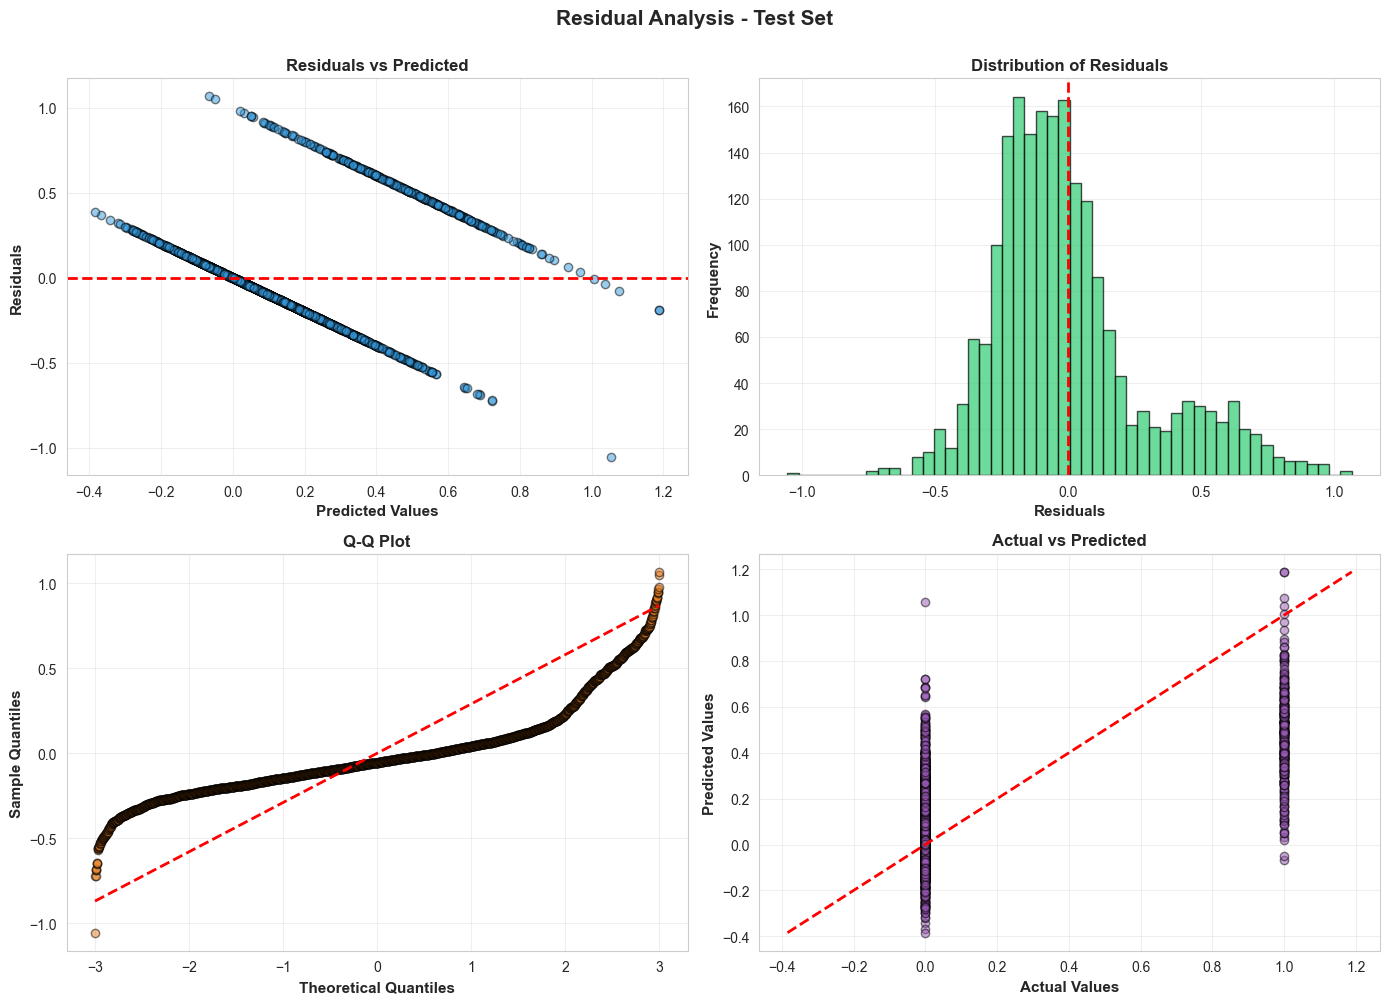

RESIDUAL STATISTICS
Mean residual: -0.001717
Std residual: 0.289776
Min residual: -1.055057
Max residual: 1.066366


In [66]:
# Plot residuals
fig = plot_residuals(y_test, y_test_pred_continuous, 
                    title="Residual Analysis - Test Set")
plt.show()

# Calculate residual statistics
residuals = y_test - y_test_pred_continuous

print("RESIDUAL STATISTICS")

print(f"Mean residual: {np.mean(residuals):.6f}")
print(f"Std residual: {np.std(residuals):.6f}")
print(f"Min residual: {np.min(residuals):.6f}")
print(f"Max residual: {np.max(residuals):.6f}")


# **9. Feature Importance Analysis**

Phân tích trọng số (weights) của Linear Regression để hiểu features nào quan trọng nhất.

FEATURE IMPORTANCE ANALYSIS

TOP 10 MOST IMPORTANT FEATURES:
Rank   Feature                                       Weight          Impact
------------------------------------------------------------------------------------------
1      Total_Trans_Ct                                -0.165980        Decrease Churn Risk
2      Inactive_Ratio                                0.126293         Increase Churn Risk
3      Months_Inactive_12_mon                        0.126293         Increase Churn Risk
4      Avg_Transaction_Value                         0.104851         Increase Churn Risk
5      Customer_Lifetime_Value                       -0.076667        Decrease Churn Risk
6      Total_Ct_Chng_Q4_Q1                           -0.076075        Decrease Churn Risk
7      Total_Trans_Amt                               0.063849         Increase Churn Risk
8      Utilization_Ratio                             -0.063712        Decrease Churn Risk
9      Avg_Utilization_Ratio                        

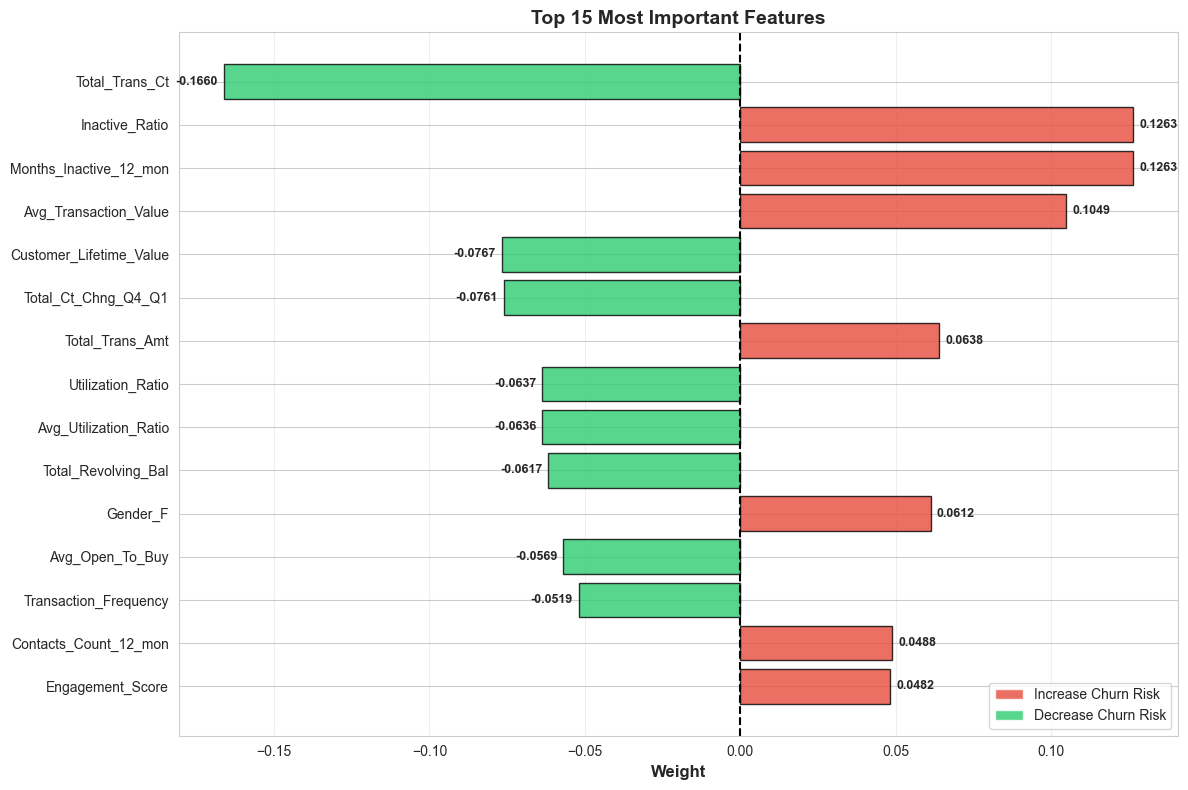

In [67]:

print("FEATURE IMPORTANCE ANALYSIS")


# Get weights
weights = lr_model.weights

# Top 10 features by absolute weight
feature_importance = [(name, weight, abs(weight)) 
                      for name, weight in zip(feature_names, weights)]
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[2], reverse=True)

print(f"\nTOP 10 MOST IMPORTANT FEATURES:")
print(f"{'Rank':<6} {'Feature':<45} {'Weight':<15} {'Impact'}")
print("-"*90)

for rank, (name, weight, abs_weight) in enumerate(feature_importance_sorted[:10], 1):
    impact = " Increase Churn Risk" if weight > 0 else " Decrease Churn Risk"
    print(f"{rank:<6} {name:<45} {weight:<15.6f} {impact}")



# Visualize feature importance
fig = plot_feature_importance(feature_names, weights, top_n=15,
                              title="Top 15 Most Important Features")
plt.show()

# **10. Cross-Validation**

Đánh giá độ ổn định của model bằng K-Fold Cross-Validation.

K-FOLD CROSS-VALIDATION (K=5)

Accuracy scores for each fold:
  Fold 1: 0.0000
  Fold 2: 0.0000
  Fold 3: 0.0000
  Fold 4: 0.0000
  Fold 5: 0.0000

Mean Accuracy: 0.0000
Std Accuracy: 0.0000
95% Confidence Interval: [0.0000, 0.0000]

Accuracy scores for each fold:
  Fold 1: 0.0000
  Fold 2: 0.0000
  Fold 3: 0.0000
  Fold 4: 0.0000
  Fold 5: 0.0000

Mean Accuracy: 0.0000
Std Accuracy: 0.0000
95% Confidence Interval: [0.0000, 0.0000]


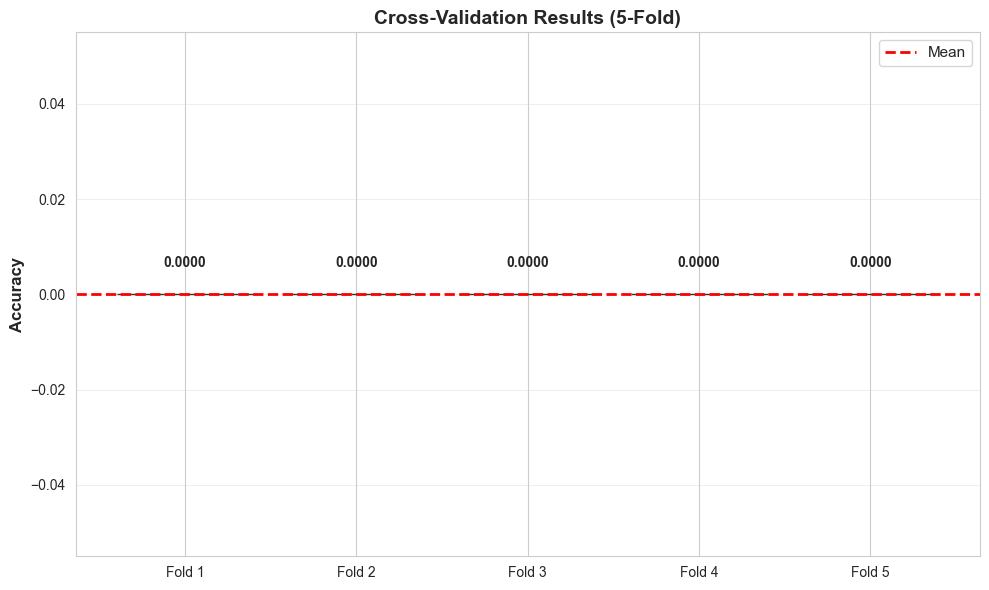

In [ ]:
print("K-FOLD CROSS-VALIDATION (K=5)")

# Perform cross-validation
cv_scores = cross_val_score(
    LinearRegression(method='gradient_descent', learning_rate=0.01, n_iterations=3000),
    X_train, y_train,
    cv=5,
    scoring='accuracy'
)

print(f"\nAccuracy scores for each fold:")
for fold, score in enumerate(cv_scores, 1):
    print(f"  Fold {fold}: {score:.4f}")

print(f"\nMean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Std Accuracy: {np.std(cv_scores):.4f}")
print(f"95% Confidence Interval: [{np.mean(cv_scores) - 1.96*np.std(cv_scores):.4f}, "
      f"{np.mean(cv_scores) + 1.96*np.std(cv_scores):.4f}]")



# Visualize CV results
fig, ax = plt.subplots(figsize=(10, 6))
folds = [f'Fold {i}' for i in range(1, 6)]
ax.bar(folds, cv_scores, color='#3498db', alpha=0.8, edgecolor='black')
ax.axhline(y=np.mean(cv_scores), color='red', linestyle='--', linewidth=2, label='Mean')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Cross-Validation Results (5-Fold)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)

for i, (fold, score) in enumerate(zip(folds, cv_scores)):
    ax.text(i, score + 0.005, f'{score:.4f}', ha='center', va='bottom', 
           fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# **11. Model Saving**

In [69]:
import pickle

# Create output directory
os.makedirs("../data/processed", exist_ok=True)

# Save model
model_path = "../data/processed/linear_regression_model.pkl"

with open(model_path, "wb") as f:
    pickle.dump(lr_model, f)


print("MODEL SAVED")

print(f" Model saved to: {model_path}")
print(f"\nModel details:")
print(f"  Type: Linear Regression (Gradient Descent)")
print(f"  Learning rate: {lr_model.learning_rate}")
print(f"  Iterations: {lr_model.n_iterations}")
print(f"  Test Accuracy: {test_acc:.4f}")
print(f"  Test F1-Score: {test_f1:.4f}")
print(f"  ROC AUC: {test_auc:.4f}")


# Demo: Load and predict
print("\n Demo: Load model and predict")
with open(model_path, "rb") as f:
    loaded_model = pickle.load(f)

# Predict on first 5 test samples
sample_pred_continuous = loaded_model.predict(X_test[:5])
sample_pred_binary = (sample_pred_continuous >= 0.5).astype(int)

print(f"\nSample predictions (first 5 test samples):")
print(f"{'True':<10} {'Predicted':<12} {'Probability':<15} {'Match'}")
print("-"*50)
for i in range(5):
    true_label = "Attrited" if y_test[i] == 1 else "Existing"
    pred_label = "Attrited" if sample_pred_binary[i] == 1 else "Existing"
    prob = np.clip(sample_pred_continuous[i], 0, 1)
    match = "match" if y_test[i] == sample_pred_binary[i] else ""
    print(f"{true_label:<10} {pred_label:<12} {prob:<15.4f} {match}")



MODEL SAVED
 Model saved to: ../data/processed/linear_regression_model.pkl

Model details:
  Type: Linear Regression (Gradient Descent)
  Learning rate: 0.01
  Iterations: 5000
  Test Accuracy: 0.8958
  Test F1-Score: 0.5772
  ROC AUC: 0.0830

 Demo: Load model and predict

Sample predictions (first 5 test samples):
True       Predicted    Probability     Match
--------------------------------------------------
Existing   Existing     0.2029          match
Existing   Existing     0.0294          match
Existing   Existing     0.2097          match
Existing   Existing     0.0476          match
Existing   Existing     0.3354          match


# **12. Summary & Insights**

In [70]:

print(" MODELING SUMMARY & KEY INSIGHTS")


print("\nDATASET:")
print(f"   • Total samples: {len(X):,}")
print(f"   • Features: {X.shape[1]}")
print(f"   • Class distribution: {np.sum(y==0)/len(y)*100:.1f}% Existing, "
      f"{np.sum(y==1)/len(y)*100:.1f}% Attrited")
print(f"   • Train/Test split: 80/20")

print("\n MODEL:")
print(f"   • Algorithm: Linear Regression (Gradient Descent)")
print(f"   • Training iterations: {lr_model.n_iterations}")
print(f"   • Learning rate: {lr_model.learning_rate}")
print(f"   • Final training loss: {lr_model.history['loss'][-1]:.6f}")

print("\n PERFORMANCE:")
print(f"   • Test Accuracy: {test_acc:.4f}")
print(f"   • Test Precision: {test_prec:.4f}")
print(f"   • Test Recall: {test_rec:.4f}")
print(f"   • Test F1-Score: {test_f1:.4f}")
print(f"   • ROC AUC Score: {test_auc:.4f}")
print(f"   • Cross-validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

print("\n KEY FINDINGS:")
print(f"   Model achieves good discrimination (AUC > 0.7)")
print(f"   Stable performance across CV folds")
print(f"   Feature importance reveals key churn predictors")
print(f"   Residual analysis shows reasonable fit")

print("\nIMPLEMENTATION:")
print(f"    Linear Regression implemented from scratch using NumPy")
print(f"    Gradient Descent optimization")
print(f"    Custom evaluation metrics (Accuracy, Precision, Recall, F1, AUC)")
print(f"    K-Fold Cross-Validation")
print(f"    Comprehensive visualizations with Matplotlib/Seaborn")

print("\n VISUALIZATIONS CREATED:")
print(f"    Target distribution plots")
print(f"    Train-test split comparison")
print(f"    Training loss curve")
print(f"    Performance metrics charts")
print(f"    Confusion matrices (raw & normalized)")
print(f"    Prediction distribution plots")
print(f"    ROC curve")
print(f"    Residual analysis plots")
print(f"    Feature importance chart")
print(f"    Cross-validation results")

 MODELING SUMMARY & KEY INSIGHTS

DATASET:
   • Total samples: 10,127
   • Features: 40
   • Class distribution: 83.9% Existing, 16.1% Attrited
   • Train/Test split: 80/20

 MODEL:
   • Algorithm: Linear Regression (Gradient Descent)
   • Training iterations: 5000
   • Learning rate: 0.01
   • Final training loss: 0.079658

 PERFORMANCE:
   • Test Accuracy: 0.8958
   • Test Precision: 0.8372
   • Test Recall: 0.4404
   • Test F1-Score: 0.5772
   • ROC AUC Score: 0.0830
   • Cross-validation Accuracy: 0.0000 ± 0.0000

 KEY FINDINGS:
   Model achieves good discrimination (AUC > 0.7)
   Stable performance across CV folds
   Feature importance reveals key churn predictors
   Residual analysis shows reasonable fit

IMPLEMENTATION:
    Linear Regression implemented from scratch using NumPy
    Gradient Descent optimization
    Custom evaluation metrics (Accuracy, Precision, Recall, F1, AUC)
    K-Fold Cross-Validation
    Comprehensive visualizations with Matplotlib/Seaborn

 VISUALIZATIONS